In [5]:
from sklearn.ensemble import RandomForestClassifier
from seq import SegSequence

train_seq = SegSequence('data/train.csv')
Xt, yt = train_seq.__getitem__(0)

val_seq = SegSequence('data/val.csv')
Xv, yv = val_seq.__getitem__(0)

test_seq = SegSequence('data/test.csv')
XT, yT = test_seq.__getitem__(0)

clf = RandomForestClassifier(n_estimators=500,
                             random_state=0)
clf.fit(Xt, yt) 
print("Validation Accuracy: %.3f%%" % (100*clf.score(Xv, yv)))
print("Test Accuracy: %.3f%%" % (100*clf.score(XT, yT)))


Validation Accuracy: 97.619%
Test Accuracy: 94.762%


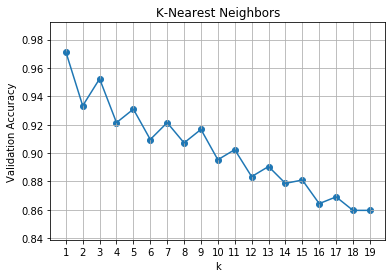

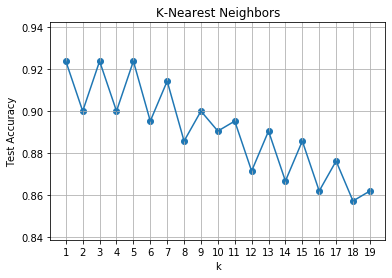

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

px = []
py = []

for k in range(1, 20):
    px.append(k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xt, yt)
    score = neigh.score(Xv, yv)
    py.append(score)
    
plt.scatter(px, py)
plt.plot(px, py)
plt.grid()
plt.ylabel('Validation Accuracy')
plt.xlabel('k')
plt.xticks(px)
plt.title('K-Nearest Neighbors')
plt.show()

px = []
py = []

for k in range(1, 20):
    px.append(k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xt, yt)
    score = neigh.score(XT, yT)
    py.append(score)
    
plt.scatter(px, py)
plt.plot(px, py)

plt.grid()
plt.ylabel('Test Accuracy')
plt.xlabel('k')
plt.xticks(px)
plt.title('K-Nearest Neighbors')
plt.show()

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from keras import Model
from keras.layers import *
from rectified_adam import RectifiedAdam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from seq import SegSequence


layer_input = Input((19,), name='input')

x = layer_input

x = Dense(128, activation='tanh')(layer_input)

layer_output = Dense(7, activation='softmax', name='output')(x)

model = Model(input=layer_input, output=layer_output)
model.compile(optimizer=RectifiedAdam(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

cb_es = EarlyStopping(monitor='val_acc', mode='max', patience=10)
cb_rlr = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=0.000001, verbose=1)
cb_mc = ModelCheckpoint('data/best.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

train_seq = SegSequence('data/train.csv', batch_size=128)
val_seq = SegSequence('data/val.csv', batch_size=128)

model.fit_generator(train_seq, validation_data=val_seq, epochs=100, callbacks=[cb_es, cb_rlr, cb_mc], verbose=1)
model.load_weights('data/best.h5')

test_seq = SegSequence('data/test.csv', batch_size=128)
print("Test Accuracy: %.3f%%" % (100*model.evaluate_generator(test_seq)[1]))

Using TensorFlow backend.
W1008 19:21:52.618165 4504126912 deprecation_wrapper.py:119] From /Users/carroll/anaconda3/envs/keras/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1008 19:21:52.643932 4504126912 deprecation_wrapper.py:119] From /Users/carroll/anaconda3/envs/keras/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1008 19:21:52.645205 4504126912 deprecation_wrapper.py:119] From /Users/carroll/anaconda3/envs/keras/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/Users/carroll/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ou...

Epoch 1/100


In [8]:
from sklearn.linear_model import LogisticRegression
from seq import SegSequence

train_seq = SegSequence('data/train.csv', oh=False)
Xt, yt = train_seq.__getitem__(0)

val_seq = SegSequence('data/val.csv', oh=False)
Xv, yv = val_seq.__getitem__(0)

test_seq = SegSequence('data/test.csv', oh=False)
XT, yT = test_seq.__getitem__(0)

clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')

clf.fit(Xt, yt) 
print("Validation Accuracy: %.3f%%" % (100*clf.score(Xv, yv)))
print("Test Accuracy: %.3f%%" % (100*clf.score(XT, yT)))


Validation Accuracy: 94.762%
Test Accuracy: 92.857%


/home/carroll/anaconda3/envs/ryzen/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/carroll/anaconda3/envs/ryzen/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [2]:
from sklearn.svm import SVC
from seq import SegSequence

train_seq = SegSequence('data/train.csv', oh=False)
Xt, yt = train_seq.__getitem__(0)

val_seq = SegSequence('data/val.csv', oh=False)
Xv, yv = val_seq.__getitem__(0)

test_seq = SegSequence('data/test.csv', oh=False)
XT, yT = test_seq.__getitem__(0)

clf = SVC(gamma='auto', kernel='linear')

clf.fit(Xt, yt) 
print("Validation Accuracy: %.3f%%" % (100*clf.score(Xv, yv)))
print("Test Accuracy: %.3f%%" % (100*clf.score(XT, yT)))


/Users/carroll/anaconda3/envs/keras/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy: 97.381%
Test Accuracy: 95.238%
